<a href="https://colab.research.google.com/github/lwy2107/GK_co_work/blob/master/%EC%8B%A0%EA%B2%BD%EB%A7%9D3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target, val_target=train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)# 은닉층에 a_layers를 사용하여 매개변수를 추가하도록 설정해놓음.
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [4]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


신경망을 함수로 하여 확인히 줄여진모습을 볼수 있다.

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


지금 훈련데이터의 키값들을 프린트 해보니 손신률과 정확도가 나온것을 볼수 있다.

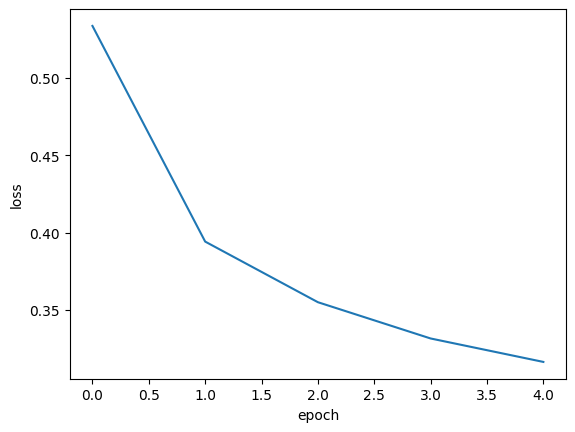

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

훈련데이터의 리턴을 그래프화 해보았다. 에포크마다의 손실율을 나타내고있다.
에포크가 높아질수록 손실률이 낮아지는것을 볼수 있다.

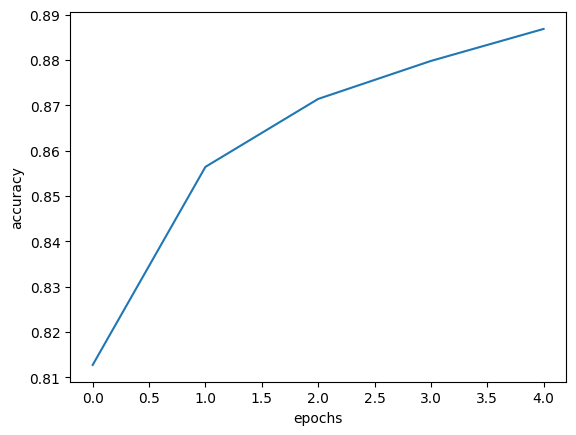

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

에포크당 예측정확도

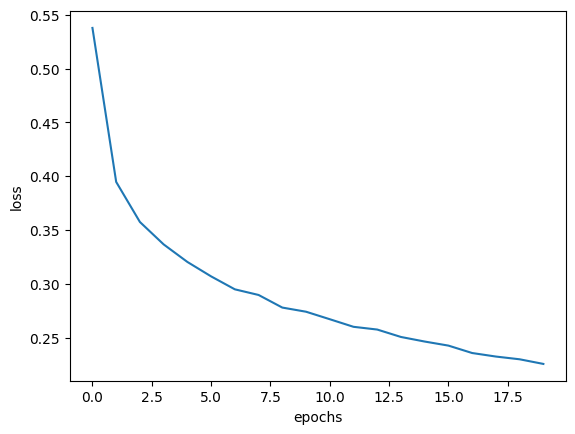

In [9]:
model=model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

에포크스를 20번한 결과이다. 보면 5회한것과 큰 차이가 없어 보인다. 그리고 과대적합이 의심되는상황이다.
이를 확인하기 위해 매개변수를 검증해야한다. 이를 손실 검증이라 한다.

In [10]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))


In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


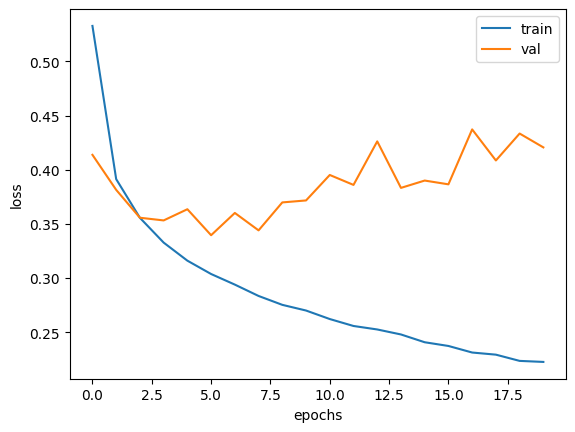

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

지금 훈련결과 히스토리값들을 멧트플롭에서 그래프화를 해보았다. 히스토리에서 손실값과 검증세트에 대한 손실을 확인해보았다. 지금 보면 훈련세트의 손실은 계속 내려가긴하지만 검증세트의 손실은 이 그래프상에선 2.5번째의 에포크에서 가장 적은것으로 나타나고 이후에는 계속 늘어나는것을 알수 있다. 즉이 모델은 과대적합이 된것이다.

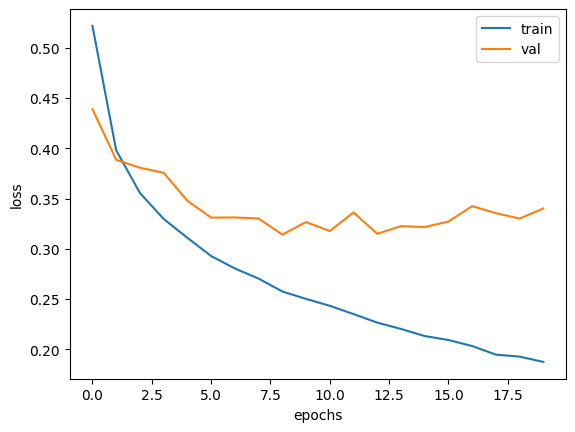

In [13]:
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

적응형학습률이 적용된 Adam을 사용하니 과대적합이 눈에띄게 줄어든것을 볼수 있다.

다른방법으로 과대적합을 줄이는것이 있는데 바로 드롭아웃이다.
드롭아웃은 뉴런중 N개를 0으로 꺼버리는데 이렇게 하면 그 뉴런에 대한 의존도가 낮아지는면도 있고 여러 층에서 이루어져 앙상블의 효과도 가져오게된다.

In [14]:
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


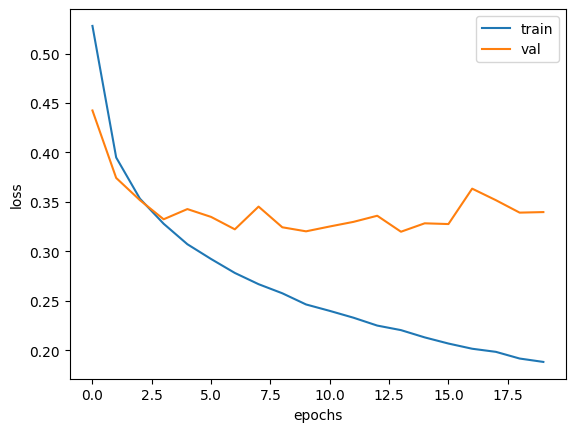

In [15]:
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


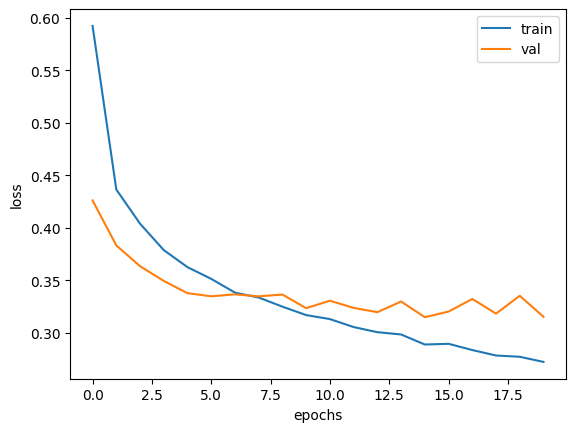

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

과대적합이 확실히 줄어들었다.
하지만 에포크를 20회를 하다보니 과대적합이 되긴했지만 위에 있는 그래프들보단 효율적으로 줄어들었다는것을 볼수 있다.

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history= model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [21]:
model.save_weights('model-weights.h5')# 모델의 파라미터 저장

In [22]:
model.save('model-whole.h5') #파라미터 저장 다른포맷

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
!ls -al *.h5 #두 파일의 저장이 제대로 되었는지 확인

-rw-r--r-- 1 root root 333320 Apr 16 02:24 model-weights.h5
-rw-r--r-- 1 root root 981176 Apr 16 02:24 model-whole.h5


In [24]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

지금 훈련하지 않은 모델을 선언한후 이전에 저장했던 후련된 모델의 파라미터를 불러와보았다.적재하는 조건은 이전 모델과 같은 구조를 가져야한다. 그렇지 않으면 에러가 난다.위의 예는 함수를 사용하여 만들었기에 같은 구조를 가지고 있다.

In [25]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))

375/375 [==============================] - 1s 3ms/step
0.87925


In [30]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.8792


[0.33225327730178833, 0.8792499899864197]

보면 예측과 정확도가 모두 동일한 값으로 나오는것을 알수 있다.
이는 모델파라미터를 제대로 로드한것을 알수 있게 해준다.
evaluate를 사용할수 있는이유는 이전 모델을 로드하여 모델구조와 옵티마이저까지 가져오기 때문에 가능한것이다.

In [35]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3133 - accuracy: 0.8883


[0.3132564425468445, 0.8883333206176758]

콜백을한후의 값을 다시 읽어서 예측을 수행하였다.

In [38]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
print(history)
print(early_stopping_cb.stopped_epoch)

11


11번째의 에포크에서 멈추었다. 그렇다면 10번째 에포크에서 가장 최상의 모델이 나왔다는게 된다.

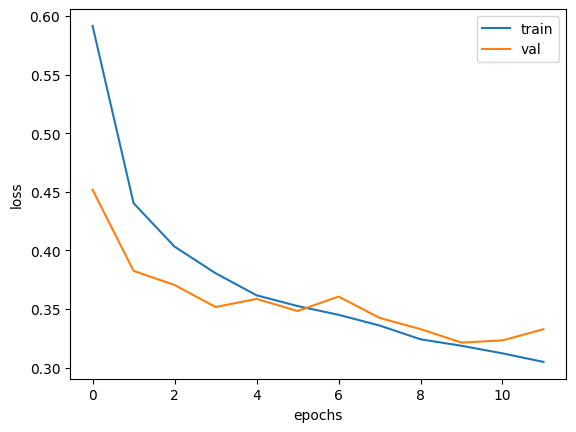

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

11번째 에포크에서 손실율이 올라가는것을 볼수 있다 그러므로 10번째 에포크에서 멈추어 더욱 컴퓨터자원과 시간을 아낄수 있게된것이다.

In [43]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3213 - accuracy: 0.8824


[0.32134854793548584, 0.8824166655540466]